Haciendo un análisis de final de año en el departamento de recursos humanos, su jefe ha detectado una subida inusual de empleados que renunciaron en el último tiempo. De un total de 1470 empleados un 16% ha renunciado.

Sorprendido por este hecho le pide a usted dos tareas fundamentales:

1. Definir el target de empleado que ha renunciado. ¿Hay uno definido? O ¿Qué características comparten aquellas personas que lo han hecho?

2. Elaborar un modelo de clasificación que permita entender qué empleados pueden llegar a irse en el próximo tiempo. No hay problemas de presupuesto para realizar iniciativas de retención pero, es importante, no perder más empleados este próximo año.

---

En base a esta consigna:

1. Realice un análisis analítico y gráfico del dataset, buscando entender qué características comparten aquellos empleados que han decidido partir.

2. Haga la limpieza necesaria del dataset (incluyendo separación en train y test), utilice el modelo de regresión logística buscando maximizar la métrica que considere adecuada y devuelva la lista de empleados que tienen una mayor proabbilidad de irse este año. Muestre y expliqué qué tanta confianza presenta su modelo.

- **OBJETIVO: MINIMIZAR FN**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


Dataset: https://www.kaggle.com/datasets/miraclenifise/hr-employee-attrition-datasets

In [2]:
df_employees= pd.read_csv('/Users/lolonastri/Desktop/IA_UCEMA/trabajos_practicos/tp2_employees/Employee-Attrition.csv')
df_employees

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

---

## **Parte 1: Comprensión y Preparación de Datos**

### → Validación de la data

In [3]:
print("El dataset tiene" , df_employees.shape[0], "filas y", df_employees.shape[1], "columnas")

El dataset tiene 1470 filas y 35 columnas


In [4]:
df_employees.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
from funciones.funciones import validate_columns
validate_columns(df_employees)

Unique_Values Num_Unique_Values  Num_Null_Values  \
Age                                NaN            1470.0                0   
Attrition                            2              1470                0   
BusinessTravel                       3              1470                0   
DailyRate                          NaN            1470.0                0   
Department                           3              1470                0   
DistanceFromHome                   NaN            1470.0                0   
Education                          NaN            1470.0                0   
EducationField                       6              1470                0   
EmployeeCount                      NaN            1470.0                0   
EmployeeNumber                     NaN            1470.0                0   
EnvironmentSatisfaction            NaN            1470.0                0   
Gender                               2              1470                0   
HourlyRate                         NaN            1470.0                0   
JobInvolvement                     NaN            1470.0                0   
JobLevel                           NaN            1470.0                0   
JobRole                              9              1470                0   
JobSatisfaction                    NaN            1470.0                0   
MaritalStatus                        3              1470                0   
MonthlyIncome                      NaN            1470.0                0   
MonthlyRate                        NaN            1470.0                0   
NumCompaniesWorked                 NaN            1470.0                0   
Over18                               1              1470                0   
OverTime                             2              1470                0   
PercentSalaryHike                  NaN            1470.0                0   
PerformanceRating                  NaN            1470.0                0   
RelationshipSatisfaction           NaN            1470.0                0   
StandardHours                      NaN            1470.0                0   
StockOptionLevel                   NaN            1470.0                0   
TotalWorkingYears                  NaN            1470.0                0   
TrainingTimesLastYear              NaN            1470.0                0   
WorkLifeBalance                    NaN            1470.0                0   
YearsAtCompany                     NaN            1470.0                0   
YearsInCurrentRole                 NaN            1470.0                0   
YearsSinceLastPromotion            NaN            1470.0                0   
YearsWithCurrManager               NaN            1470.0                0   

                          %_Null_Values  \
Age                                 0.0   
Attrition                           0.0   
BusinessTravel                      0.0   
DailyRate                           0.0   
Department                          0.0   
DistanceFromHome                    0.0   
Education                           0.0   
EducationField                      0.0   
EmployeeCount                       0.0   
EmployeeNumber                      0.0   
EnvironmentSatisfaction             0.0   
Gender                              0.0   
HourlyRate                          0.0   
JobInvolvement                      0.0   
JobLevel                            0.0   
JobRole                             0.0   
JobSatisfaction                     0.0   
MaritalStatus                       0.0   
MonthlyIncome                       0.0   
MonthlyRate                         0.0   
NumCompaniesWorked                  0.0   
Over18                              0.0   
OverTime                            0.0   
PercentSalaryHike                   0.0   
PerformanceRating                   0.0   
RelationshipSatisfaction            0.0   
StandardHours                       0.0   
StockOptionLevel                    0.0   
Total

In [6]:
df_employees.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

---

### →  Veo los tipos de datos con dtypes

In [7]:
df_employees.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
df_employees['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

---

### → Columnas que no son necesarias

#### Paso a dropear las siguientes columnas:
##### `EmployeeCount`: Me muestra la misma cantidad de registros que la longitud del dataset.
##### `StandardHours`: Son todos 80
##### `Over18`: Todos son mayores de 18 años para poder trabajar.
##### `EmployeeNumber`: Es un ID único para cada empleado, no aporta información relevante.


In [9]:
df_employees.drop(columns=['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber'], inplace=True)

In [10]:
for col in df_employees.columns:
    print(f"Value counts for {col}:")
    print(df_employees[col].value_counts())
    print("\n")


Value counts for Age:
Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
33    58
38    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
51    19
53    19
48    19
54    18
52    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64


Value counts for Attrition:
Attrition
No     1233
Yes     237
Name: count, dtype: int64


Value counts for BusinessTravel:
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64


Value counts for DailyRate:
DailyRate
691     6
408     5
530     5
1329    5
1082    5
       ..
650     1
279     1
316     1
314     1
628     1
Name: count, Length: 886, dtype: int64


Value counts for Department:
Department
Research & Development    961
Sales                     446
Human Resources           

---

### → Valores outliers

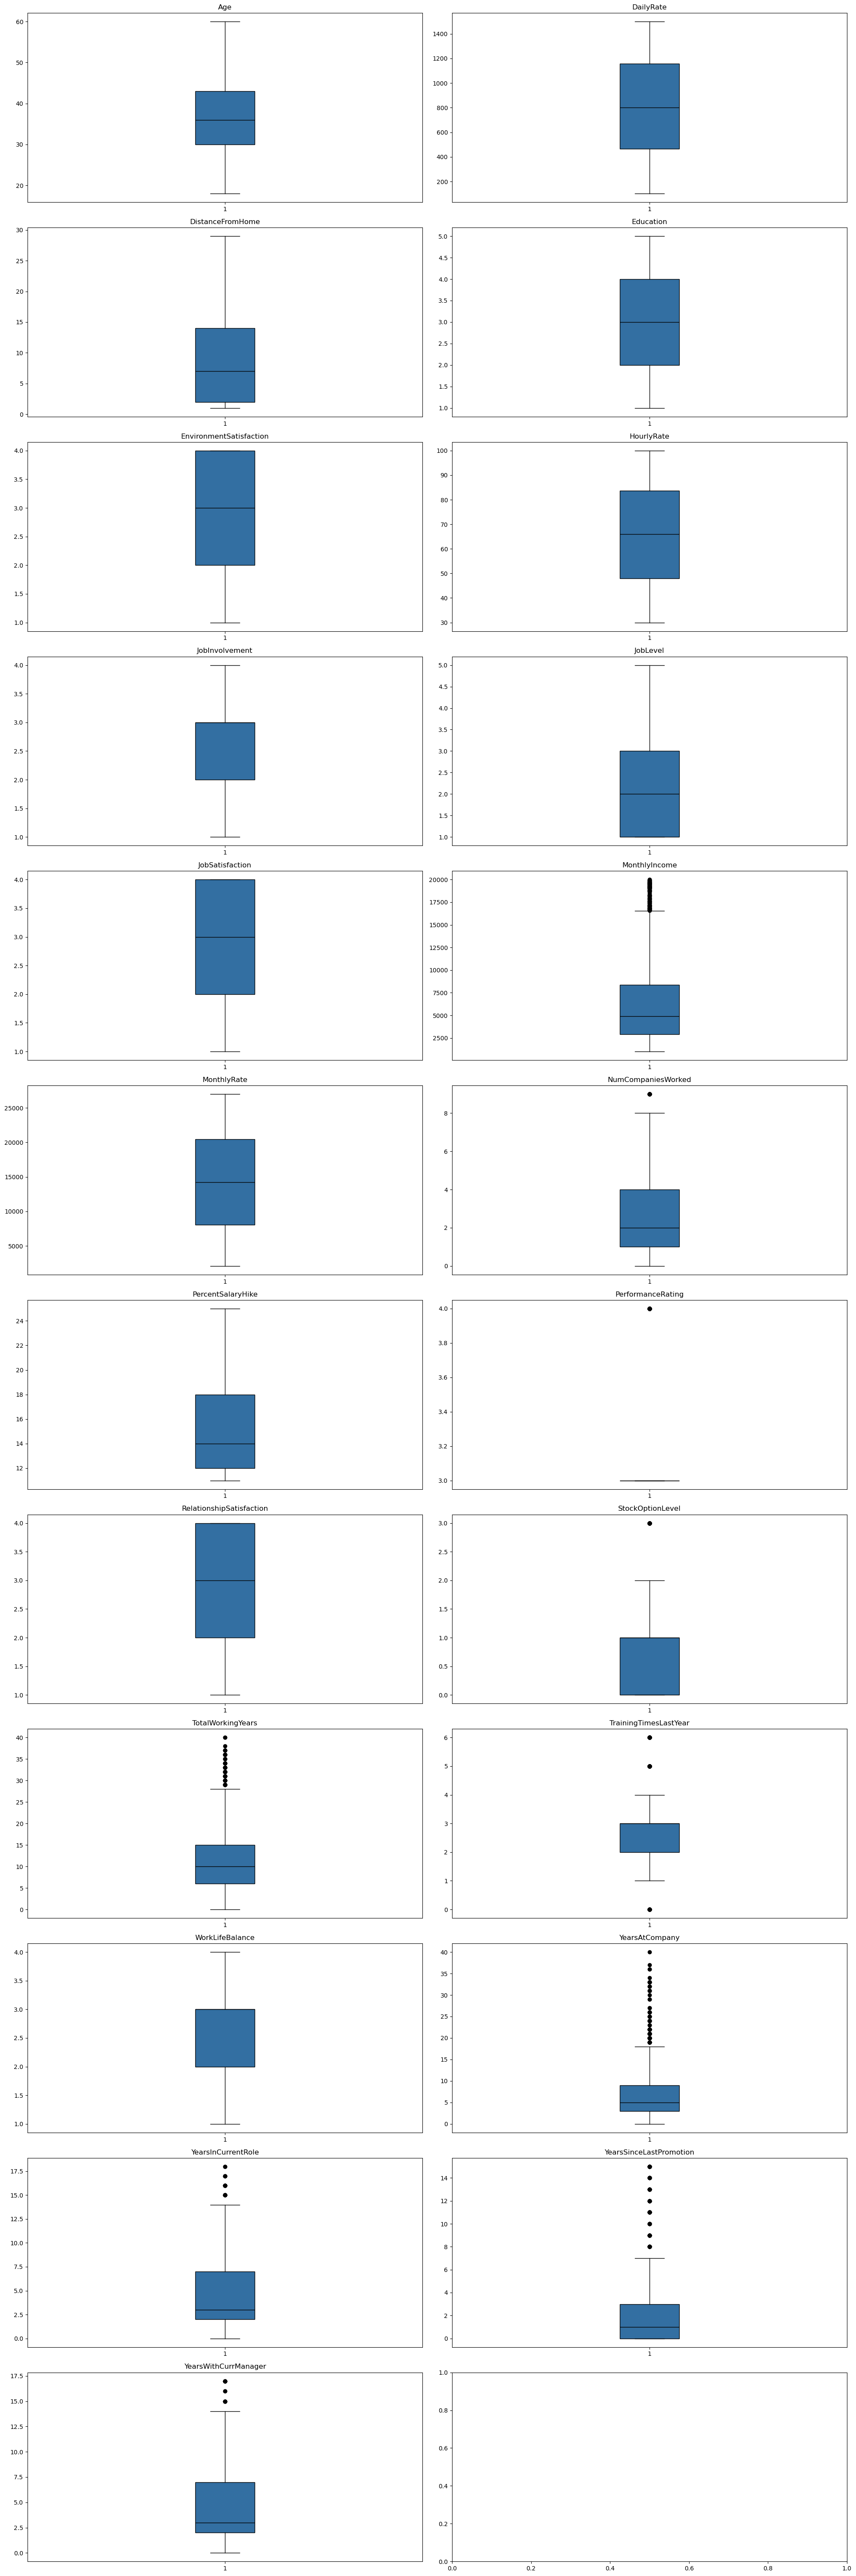

In [11]:
from funciones.funciones import plot_outliers
plot_outliers(df_employees)

#### Para este análisis he tomado la decisión de no remover los outliers, ya que son valores que pueden ser reales y no errores de carga de datos. Además, al ser un dataset de empleados, es posible que existan valores altos de las distintas variables, como por ejemplo MonthlyIncome.

In [12]:
#from funciones.funciones import reconocimiento_de_outliers
#outliers_monthly_income, outlier_values_monthly_income = reconocimiento_de_outliers(df_employees, "MonthlyIncome", 1.5)
#outliers_years_at_company, outlier_values_years_at_company = reconocimiento_de_outliers(df_employees, "YearsAtCompany", 1.5)

---

## **Parte 2: Análisis Exploratorio de Datos**


### → Análisis de sesgos por edad. Usa groupby para calcular la tasa de retiro promedio por grupo de edad. 

In [13]:
df_employees["Attrition"].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [14]:
df_employees['Attrition'] = df_employees['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)

In [15]:
tasa_de_retiro_etaria = round(df_employees.groupby("Age").agg({"Attrition" : "mean"}).reset_index(), 2)
tasa_de_retiro_etaria

Age  Attrition
0    18       0.50
1    19       0.67
2    20       0.55
3    21       0.46
4    22       0.31
5    23       0.29
6    24       0.27
7    25       0.23
8    26       0.31
9    27       0.06
10   28       0.29
11   29       0.26
12   30       0.15
13   31       0.26
14   32       0.18
15   33       0.21
16   34       0.12
17   35       0.13
18   36       0.09
19   37       0.12
20   38       0.03
21   39       0.14
22   40       0.09
23   41       0.15
24   42       0.04
25   43       0.06
26   44       0.18
27   45       0.05
28   46       0.12
29   47       0.12
30   48       0.11
31   49       0.08
32   50       0.17
33   51       0.11
34   52       0.17
35   53       0.11
36   54       0.00
37   55       0.14
38   56       0.21
39   57       0.00
40   58       0.36
41   59       0.00
42   60       0.00

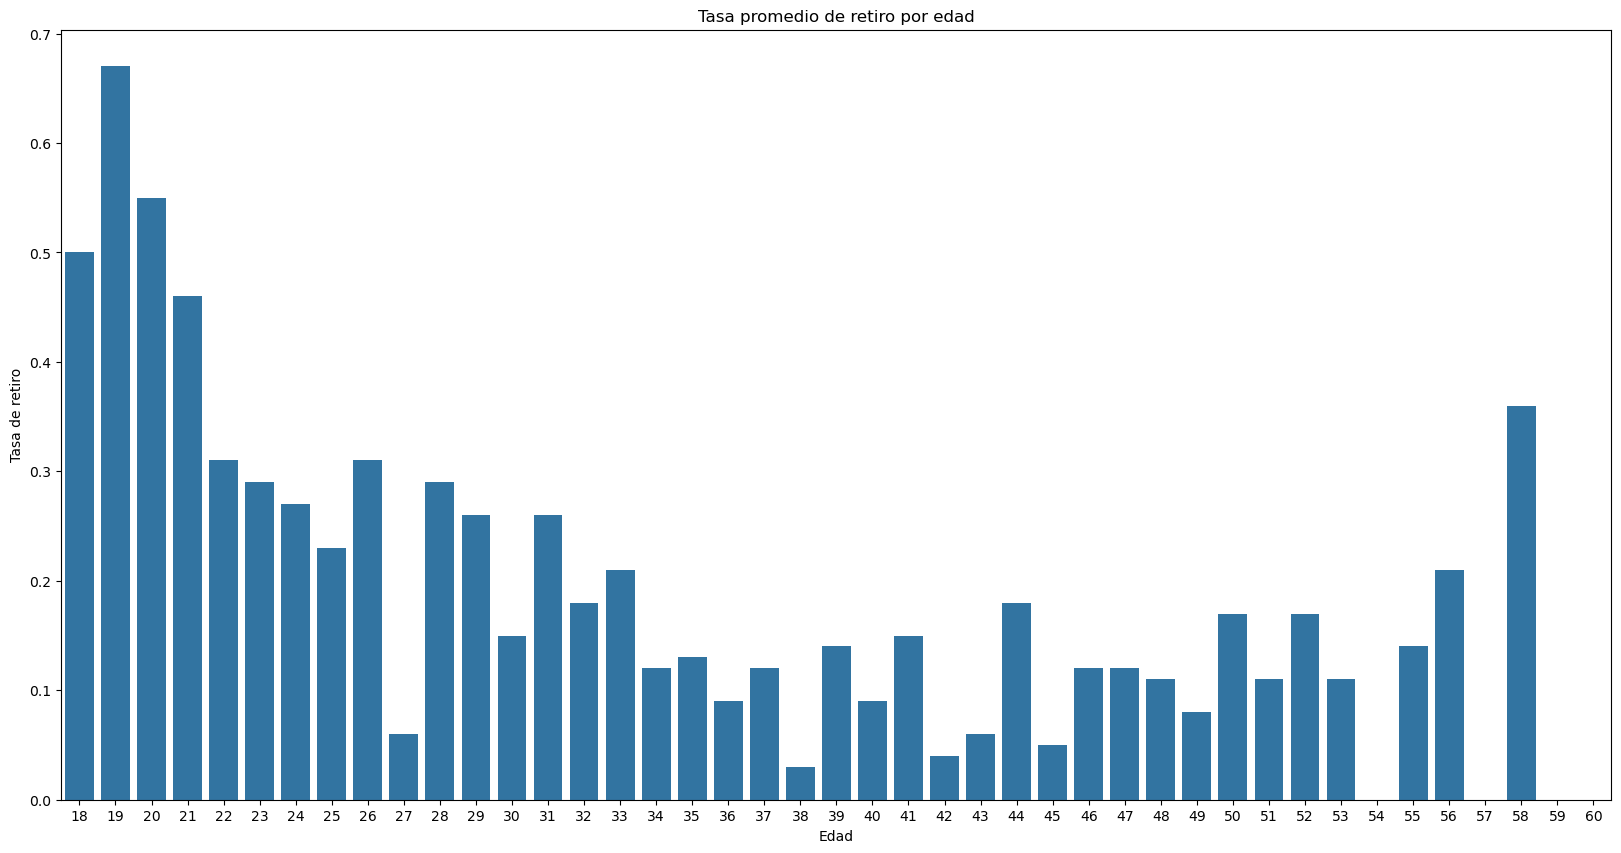

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.barplot(data=tasa_de_retiro_etaria, x="Age", y="Attrition")
plt.title("Tasa promedio de retiro por edad")
plt.xlabel("Edad")
plt.ylabel("Tasa de retiro")
plt.show()

Text(0, 0.5, 'Frecuencia')

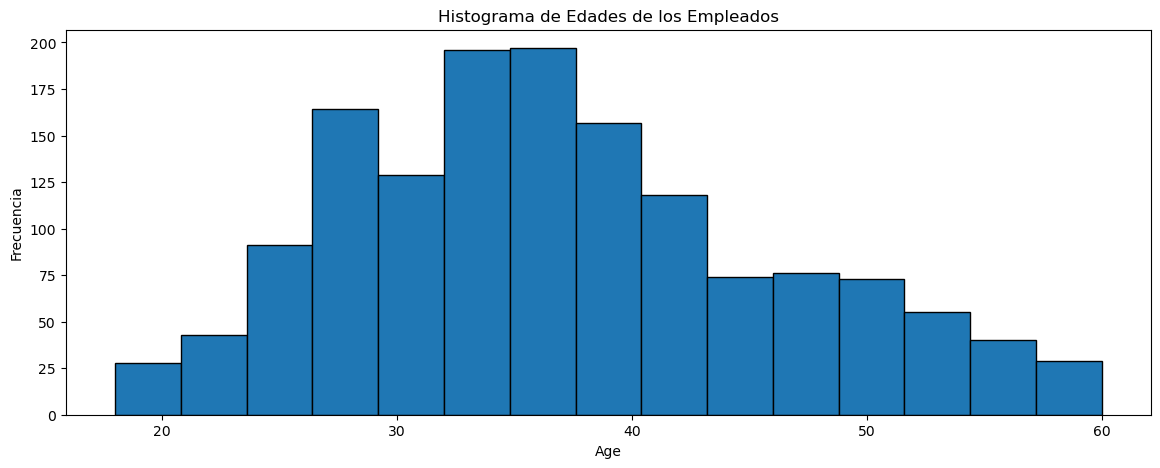

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 5))
plt.hist(df_employees['Age'], bins=15, edgecolor='black')
plt.title('Histograma de Edades de los Empleados')
plt.xlabel('Age')
plt.ylabel('Frecuencia')

### → Creo histogramas de edad para Attrition y no Attrition.

/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_13716/3323234664.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_employees[filtro1]['Age'], label="No renuncia", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_13716/3323234664.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad63727

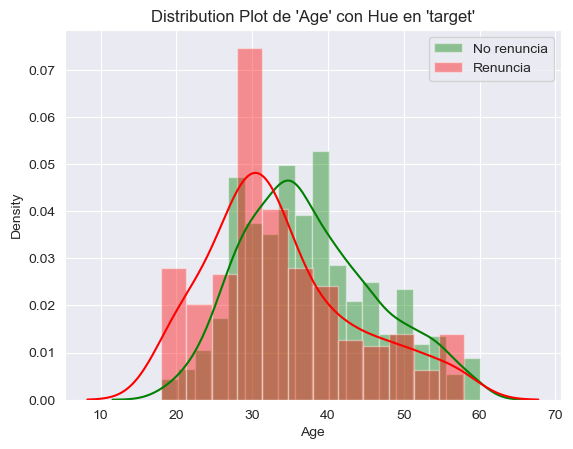

In [18]:
sns.set_style('darkgrid')

filtro1 = df_employees["Attrition"] == 0
filtro2 = df_employees["Attrition"] == 1

sns.distplot(df_employees[filtro1]['Age'], label="No renuncia", color="green")
sns.distplot(df_employees[filtro2]['Age'], label="Renuncia", color="red")

plt.title("Distribution Plot de 'Age' con Hue en 'target'")
plt.legend()
plt.show()

In [19]:
def grupo_etario(x):
    if x <= 30:
        return "joven"
    elif 31 <= x <= 45:
        return "adulto"
    else:
        return "senior"

df_employees["grupo_etario"] = df_employees["Age"].apply(grupo_etario)

In [20]:
df_employees.groupby("grupo_etario").agg({"Attrition" : "mean"}).reset_index()

grupo_etario  Attrition
0       adulto   0.127004
1        joven   0.259067
2       senior   0.124542

In [21]:
df_employees.groupby("grupo_etario").agg({"Attrition" : "sum"}).reset_index()

grupo_etario  Attrition
0       adulto        103
1        joven        100
2       senior         34

### → Podemos decir entonces que el grupo etario que tiene mayor tasa de incumplimiento es el de los jovenes, pero no podemos afirmar que la edad sea un factor determinante para la renuncia.

##### Comparación entre menores y mayores


In [22]:
adolescentes = df_employees[df_employees["grupo_etario"] == "menor"] # Grupo 1
mayores = df_employees[df_employees["grupo_etario"] == "mayor"] # Grupo 2

In [23]:
import scipy.stats as stats
from scipy.stats import ttest_ind

group1 = adolescentes["Attrition"]
group2 = mayores["Attrition"]

t_stat, p_value = ttest_ind(group1, group2)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de attrition entre los adolescentes y los mayores.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos")

No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos


##### Comparación entre jóvenes adultos y adultos

In [24]:
jovenes_adultos = df_employees[df_employees["grupo_etario"] == "joven adulto"] # Grupo 3
adultos = df_employees[df_employees["grupo_etario"] == "adulto"] # Grupo 4

In [25]:
group3 = jovenes_adultos["Attrition"]
group4 = adultos["Attrition"]

t_stat, p_value = ttest_ind(group3, group4)

if p_value < 0.05:
    print("Rechazar la hipótesis nula. Hay una diferencia significativa de la tasa de attrition entre los jóvenes adultos y los adultos.")
else:
    print("No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos")

No rechazar la hipótesis nula. No hay diferencias significativas entre la tasa de attrition de ambos grupos


### → Análisis de sesgos por MonthlyIncome. Genero histogramas de 'MonthlyIncome' para visualizar la distribución de los montos para personas que renunciaron y no renunciaron.

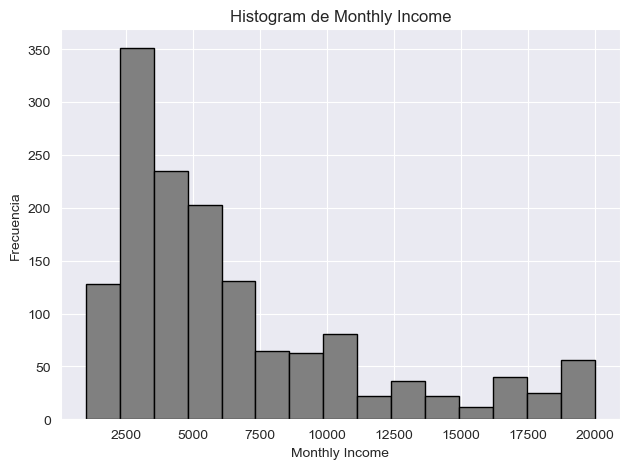

In [26]:
plt.figsize=(14, 5)
plt.hist(df_employees['MonthlyIncome'], bins=15, edgecolor='black', color='gray')
plt.title('Histogram de Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [27]:
yes_attrition = df_employees[df_employees['Attrition'] == 1]
no_attrition = df_employees[df_employees['Attrition'] == 0]

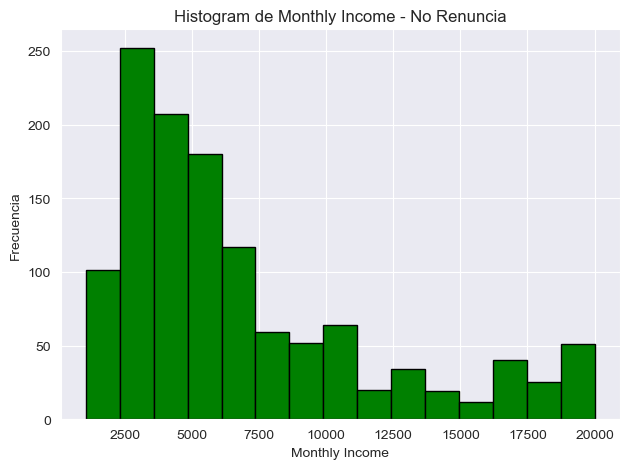

In [28]:
plt.figsize=(14, 5)
plt.hist(no_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="green")
plt.title('Histogram de Monthly Income - No Renuncia')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


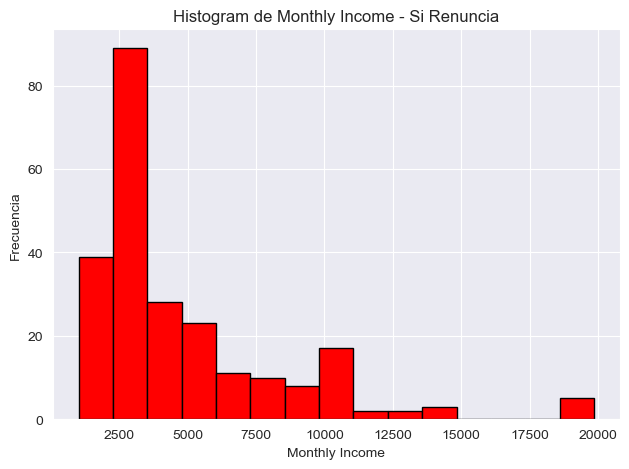

In [29]:
plt.figsize=(14, 5)
plt.hist(yes_attrition["MonthlyIncome"], bins=15, edgecolor='black', color="red")
plt.title('Histogram de Monthly Income - Si Renuncia')
plt.xlabel('Monthly Income')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_13716/607915791.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(no_attrition["MonthlyIncome"], label="No Renuncia", color="green")
/var/folders/xx/hcklcr8s0rxd7p5fz63z342w0000gn/T/ipykernel_13716/607915791.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

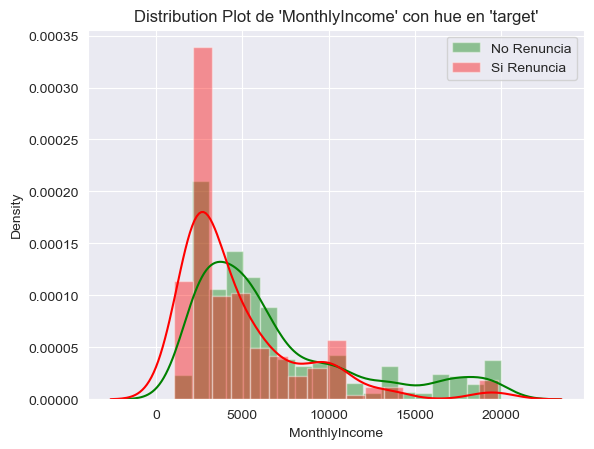

In [30]:
sns.set_style('darkgrid')

sns.distplot(no_attrition["MonthlyIncome"], label="No Renuncia", color="green")
sns.distplot(yes_attrition["MonthlyIncome"], label="Si Renuncia", color="red")

plt.title("Distribution Plot de 'MonthlyIncome' con hue en 'target'")
plt.legend()
plt.show()

<Axes: ylabel='MonthlyIncome'>

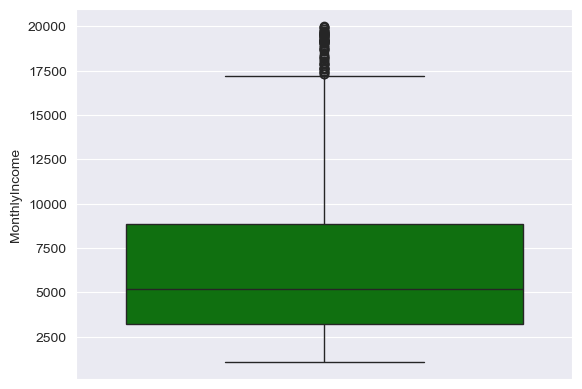

In [31]:
sns.boxplot(no_attrition["MonthlyIncome"], color="green") # Los empleados que no renuncian tienen un ingreso mensual más alto.

<Axes: ylabel='MonthlyIncome'>

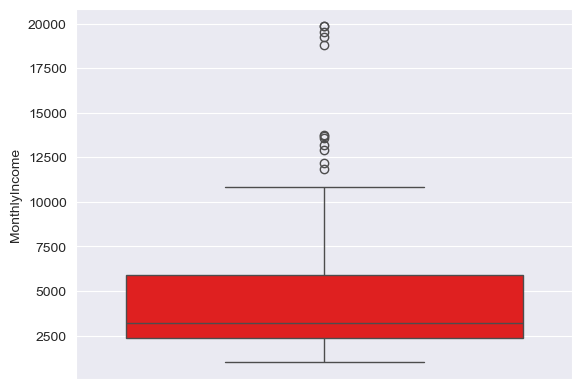

In [32]:
sns.boxplot(yes_attrition["MonthlyIncome"], color="red") # Los empleados que renuncian tienen una media de ingresos más bajos.

#### → Tasa de attrition por departamento.

In [33]:
df_employees.groupby("Department").agg({"Attrition" : "mean"}).reset_index()

Department  Attrition
0         Human Resources   0.190476
1  Research & Development   0.138398
2                   Sales   0.206278

### `Análisis por variables numéricas (promedios según Attrition)`

In [34]:
df_employees.groupby("Attrition").agg({"Age": "mean", "DistanceFromHome": "mean", "EnvironmentSatisfaction": "mean", "JobInvolvement": "mean", "JobSatisfaction": "mean", "NumCompaniesWorked": "mean", "PerformanceRating": "mean", "RelationshipSatisfaction": "mean", "TotalWorkingYears": "mean", "WorkLifeBalance": "mean",}).reset_index()

Attrition        Age  DistanceFromHome  EnvironmentSatisfaction  \
0          0  37.561233          8.915653                 2.771290   
1          1  33.607595         10.632911                 2.464135   

   JobInvolvement  JobSatisfaction  NumCompaniesWorked  PerformanceRating  \
0        2.770479         2.778589            2.645580           3.153285   
1        2.518987         2.468354            2.940928           3.156118   

   RelationshipSatisfaction  TotalWorkingYears  WorkLifeBalance  
0                  2.733982          11.862936         2.781022  
1                  2.599156           8.244726         2.658228

### `Distribución general de la variable Attrition`

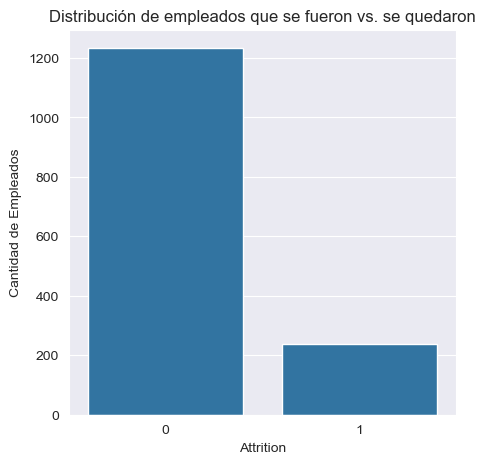

In [35]:
plt.figure(figsize=(5, 5))
sns.countplot(data=df_employees, x='Attrition')
plt.title("Distribución de empleados que se fueron vs. se quedaron")
plt.ylabel("Cantidad de Empleados")
plt.show()


### `Análisis por variables categóricas (satisfacción, desempeño, balance)`

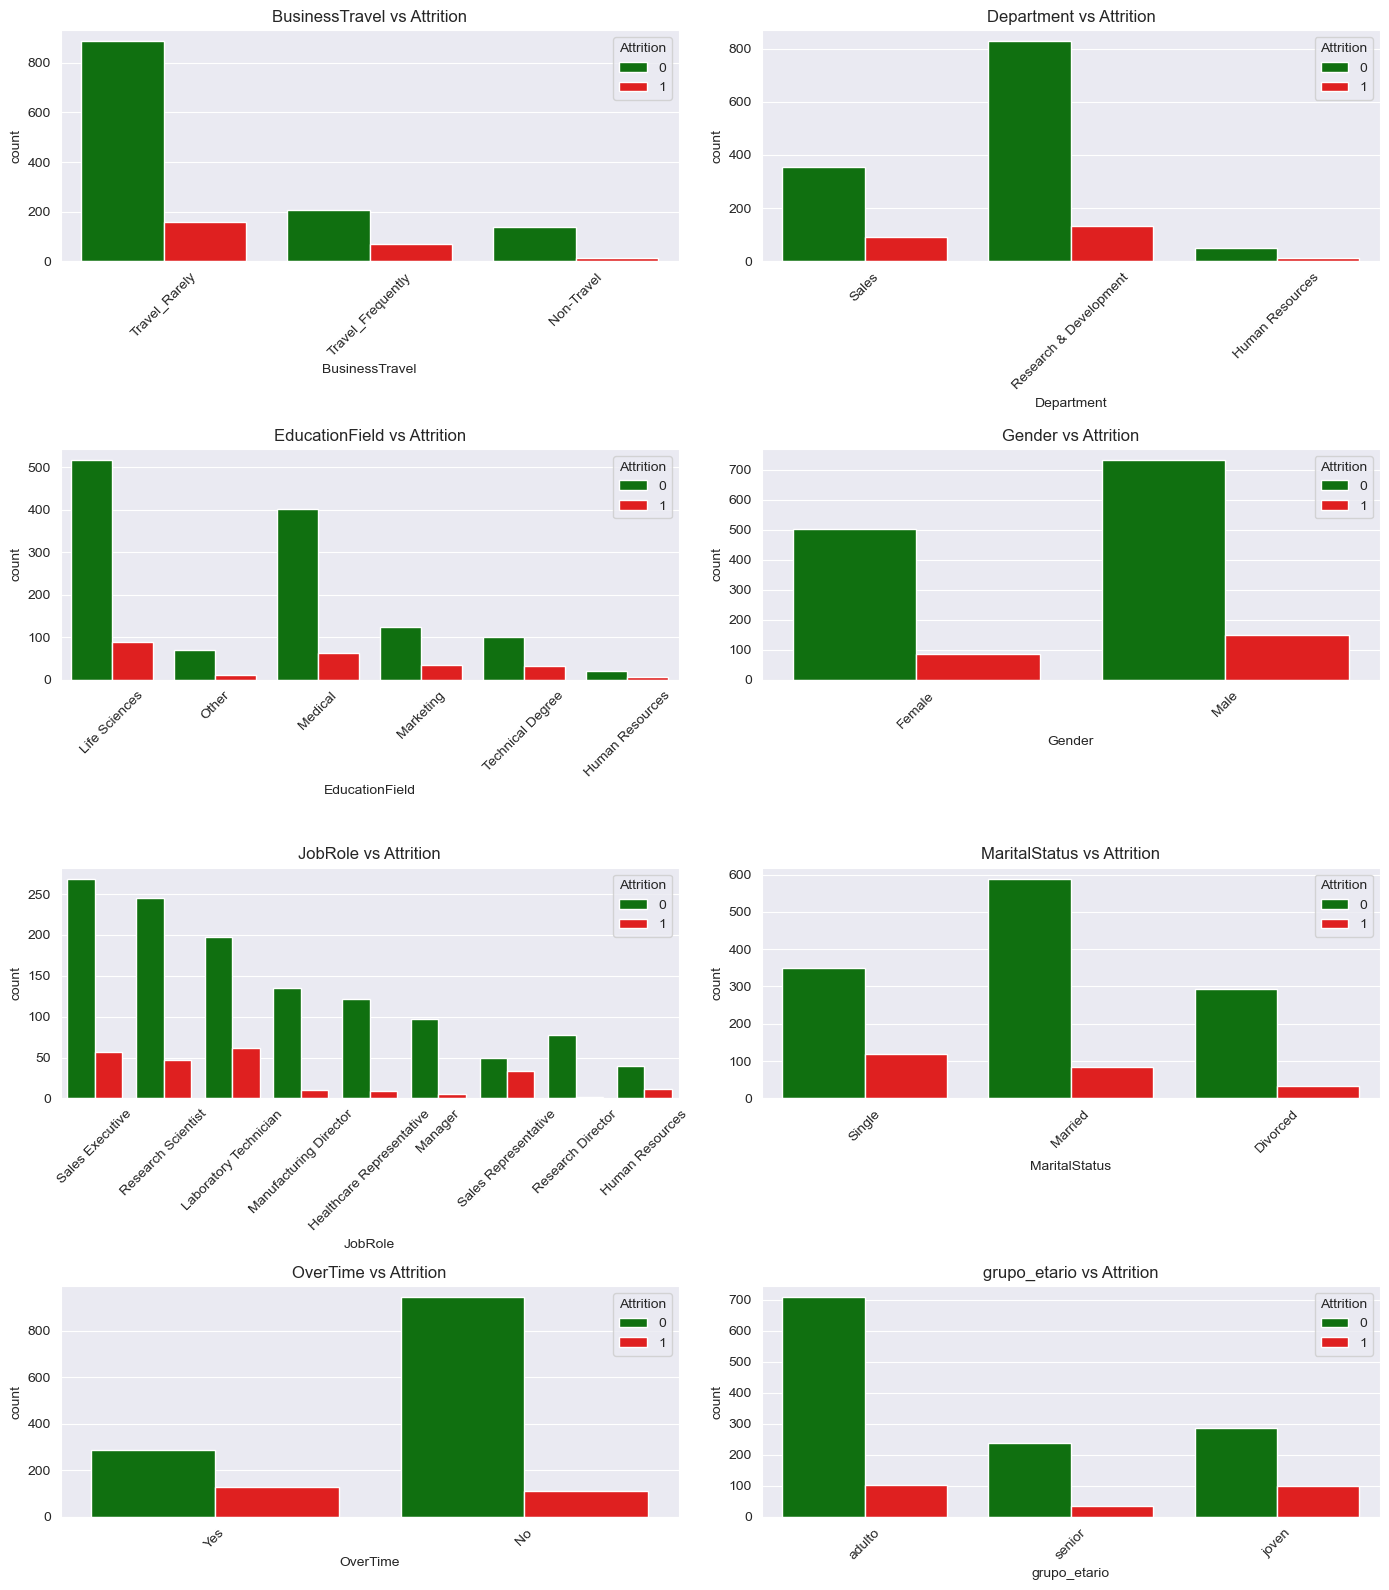

In [36]:
import math

categoricas = df_employees.select_dtypes(exclude=[np.number]).columns.tolist()

categoricas = categoricas

fig, axs = plt.subplots(math.ceil(len(categoricas)/2), 2, figsize=(14, 4 * math.ceil(len(categoricas)/2)))
axs = axs.flatten()

custom_palette = {1: 'Red', 0: 'Green'}

for i, col in enumerate(categoricas):
    sns.countplot(data=df_employees, x=col, hue='Attrition', palette=custom_palette, ax=axs[i])
    axs[i].set_title(f'{col} vs Attrition')
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


## 📌 Conclusión

Con base en el análisis realizado, los empleados que han decidido abandonar la empresa tienden a compartir ciertas características que los distinguen del resto. A continuación, se resumen las principales tendencias observadas:

| **Columna (Característica)**           | **Tendencia entre quienes se van** |
|----------------------------------------|-------------------------------------|
| 🧑‍🎓 `Age`                              | Más jóvenes                         |
| 🏠 `DistanceFromHome`                  | Mayor distancia                     |
| 📈 `TotalWorkingYears`                 | Menor experiencia                   |
| 😊 `JobSatisfaction`                   | Baja satisfacción laboral           |
| ⚖️ `WorkLifeBalance`                   | Bajo equilibrio vida-trabajo        |
| 💼 `JobInvolvement`                    | Bajo involucramiento en el trabajo  |
| 🔁 `NumCompaniesWorked`                | Mayor rotación laboral previa       |

Estas tendencias sugieren que el **compromiso, la satisfacción y la estabilidad laboral** son factores clave a considerar en estrategias de retención de talento.


---

## **Parte 3: Preparación de Datos para Modelado**


### → Selección de Características. Decido qué variables incluir en el modelo. Considero excluir variables con sesgos introducidos artificialmente para evaluar su impacto en el rendimiento del modelo.

In [37]:
df_employees.select_dtypes(include=['object']).columns


Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime', 'grupo_etario'],
      dtype='object')

In [38]:
df_employees.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'grupo_etario'],
      dtype='object')

#### → Hago get_dummies para las variables categóricas porque si hago LabelEncoder, el modelo puede interpretar que hay un orden entre las categorías. Por ejemplo, en la variable `JobRole`, si hago LabelEncoder, el modelo podría pensar que `Healthcare Representative` es menor que `Human Resources` y eso no es cierto. Por lo tanto, uso get_dummies para evitar este problema.

In [39]:
columns_para_encodear = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', "OverTime", 'grupo_etario']

In [40]:
df_employees = pd.get_dummies(df_employees, columns=columns_para_encodear, drop_first=True)

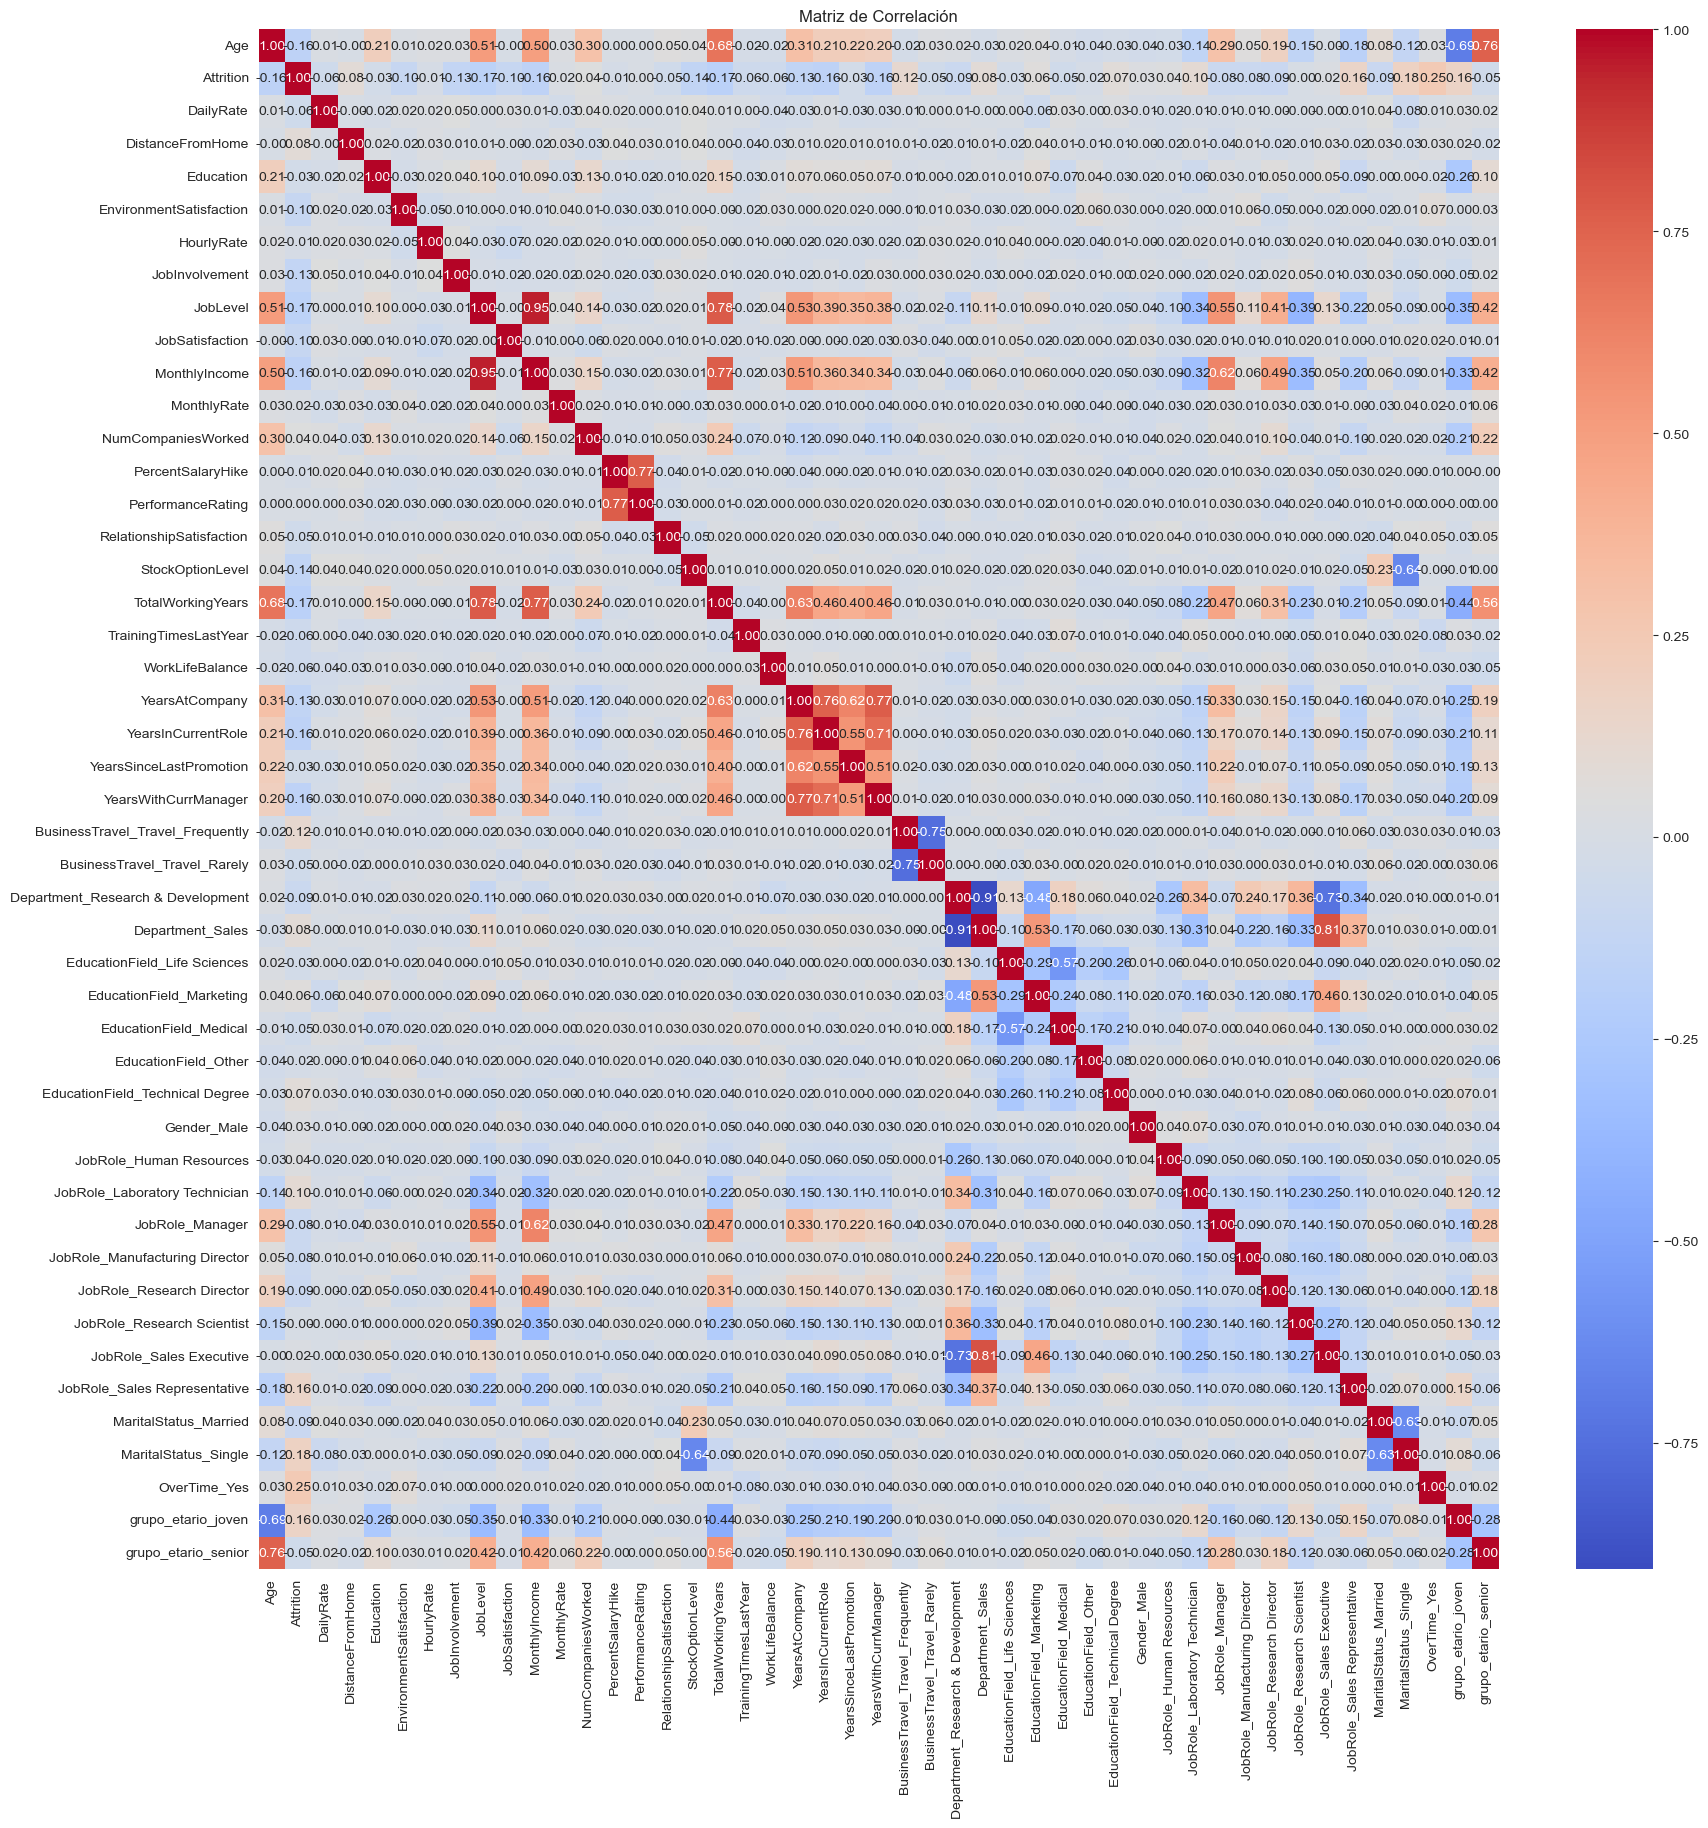

In [41]:
# hacer matriz de correlacion y filtrar las correlaciones mayores a 0.5
plt.figure(figsize=(20, 20))
sns.heatmap(df_employees.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación")
plt.show()


In [42]:
X = df_employees[df_employees != 'Attrition']
y = df_employees['Attrition']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42) # separo asi para que el modelo no haga overfitting

#### → Clase desbalanceada. `Attrition` tiene una proporción muy desigual entre clases. Esto genera un modelo sesgado hacia predecir “No”, entonces uso `SMOTE` para balancear las clases.

In [44]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(class_weight='balanced', max_iter=1000)

In [45]:
logisticRegr.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000)

In [46]:
# performance en test
y_pred = logisticRegr.predict(X_test)
print('El accuracy de nuestra regresión logística en el set de Test es: {:.2f}'.format(logisticRegr.score(X_test, y_test)))

El accuracy de nuestra regresión logística en el set de Test es: 0.90


In [47]:
# performance en test
y_pred_train = logisticRegr.predict(X_train)
print('El accuracy de nuestra regresión logística en el set de Training es: {:.2f}'.format(logisticRegr.score(X_train, y_train)))

El accuracy de nuestra regresión logística en el set de Training es: 0.92


In [48]:
logisticRegr.coef_
logisticRegr.intercept_
coeficientes= pd.DataFrame(logisticRegr.coef_[0],
                X.columns,
                columns=['coef'])
coeficientes

coef
Age                                0.036229
Attrition                          2.482742
DailyRate                          0.000377
DistanceFromHome                  -0.003333
Education                          0.195542
EnvironmentSatisfaction           -0.387781
HourlyRate                         0.002991
JobInvolvement                    -0.353947
JobLevel                           0.030193
JobSatisfaction                   -0.363709
MonthlyIncome                     -0.000095
MonthlyRate                        0.000042
NumCompaniesWorked                 0.069409
PercentSalaryHike                 -0.027569
PerformanceRating                  0.133642
RelationshipSatisfaction          -0.071278
StockOptionLevel                  -0.629326
TotalWorkingYears                 -0.138068
TrainingTimesLastYear             -0.131512
WorkLifeBalance                   -0.024984
YearsAtCompany                     0.397642
YearsInCurrentRole                -0.431805
YearsSinceLastPromotion            0.021431
YearsWithCurrManager              -0.121183
BusinessTravel_Travel_Frequently   0.241358
BusinessTravel_Travel_Rarely       0.024262
Department_Research & Development -0.223503
Department_Sales                   0.299104
EducationField_Life Sciences      -0.188673
EducationField_Marketing           0.156044
EducationField_Medical            -0.091725
EducationField_Other               0.000205
EducationField_Technical Degree    0.177656
Gender_Male                        0.134349
JobRole_Human Resources            0.012100
JobRole_Laboratory Technician      0.129534
JobRole_Manager                   -0.002754
JobRole_Manufacturing Director    -0.058894
JobRole_Research Director         -0.054229
JobRole_Research Scientist        -0.072838
JobRole_Sales Executive            0.091310
JobRole_Sales Representative       0.188565
MaritalStatus_Married             -0.160172
MaritalStatus_Single               0.557495
OverTime_Yes                       0.816175
grupo_etario_joven                 0.294968
grupo_etario_senior                0.081618

### *Métricas de evaluación*


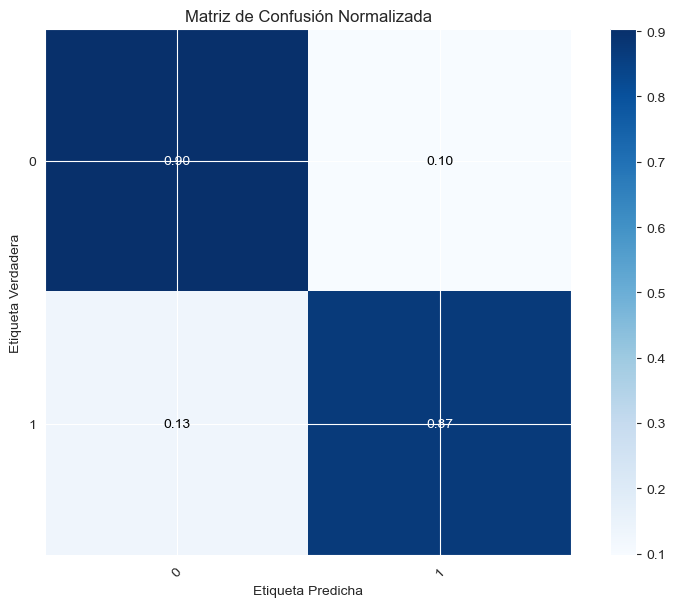

In [49]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Supongamos que tienes tus etiquetas verdaderas y etiquetas predichas
# Calcula la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Obtiene las etiquetas únicas de las clases
classes = unique_labels(y_test, y_pred)

# Visualiza la matriz de confusión
def plot_confusion_matrix(cm, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    plt.title(title if title else 'Matriz de Confusión')
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta Verdadera')
    plt.xlabel('Etiqueta Predicha')

# Llama a la función para mostrar la matriz de confusión
plot_confusion_matrix(cm, classes=classes, normalize=True, title='Matriz de Confusión Normalizada')
plt.show()

In [50]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[343  37]
 [  8  53]]


##### Entendiendo la matriz de confusion:
* TP (53):Empleados que renunciaron y fueron correctamente identificados por el modelo.
* TN (343): Empleados que no renunciaron y fueron correctamente identificados por el modelo.
* FP (37): Empleados que no renunciaron pero fueron incorrectamente identificados como que renunciarían.
* FN (8): Empleados que renunciaron pero fueron incorrectamente identificados como que no renunciarían.

##### En este caso, el modelo tiene un buen rendimiento en la identificación de empleados que renuncian (TP) y en la identificación de empleados que no renuncian (TN). Sin embargo, también tiene un número significativo de falsos positivos (FP) y falsos negativos (FN), lo que indica que hay margen de mejora en la precisión del modelo.

### **Precision, Recall y F-Score**

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### TRAIN

In [52]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_train, y_pred_train)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_train, y_pred_train)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_train, y_pred_train)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_train, y_pred_train)
print('F1 score: %f' % f1)

Accuracy: 0.918367
Precision: 0.705357
Recall: 0.897727
F1 score: 0.790000


### TEST

In [53]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)

Accuracy: 0.897959
Precision: 0.588889
Recall: 0.868852
F1 score: 0.701987


#### En este caso, entre accuracy, precision, recall y f1-score, elijo f1-score como métrica principal porque es una combinación de precisión y recall. Esto es importante en este caso porque queremos minimizar tanto los falsos positivos como los falsos negativos. Un alto f1-score indica que el modelo tiene un buen equilibrio entre precisión y recall.
 
#### Haciendo referencia a este dataset de empleados, un alto f1-score significa que el modelo es capaz de identificar correctamente a los empleados que renunciaron (`Attrition` = 1) y a los que no renunciaron (`Attrition` = 0) con un buen equilibrio entre precisión y recall. Esto es crucial para la empresa, ya que permite tomar decisiones informadas sobre la retención de talento y la implementación de estrategias adecuadas para abordar el problema del aumento de renuncias.



### ROC

In [54]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [55]:
logit_roc_auc = roc_auc_score(y_test, logisticRegr.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logisticRegr.predict_proba(X_test)[:,1])

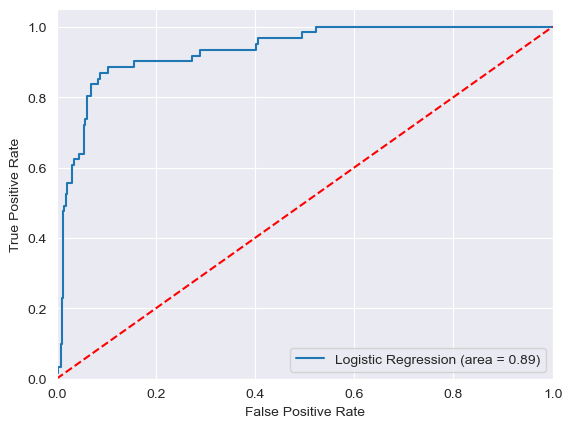

In [56]:
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [57]:
# Calcular el AUC-ROC
auc_roc_test = roc_auc_score(y_test, y_pred)
print("Área bajo la curva ROC Test:", auc_roc_test)

Área bajo la curva ROC Test: 0.8857420189818809


In [58]:
# Calcular el AUC-ROC
auc_roc_train = roc_auc_score(y_train, y_pred_train)
print("Área bajo la curva ROC Training:", auc_roc_train)

Área bajo la curva ROC Training: 0.9101766492592988


In [59]:
resultado_modelo = X_test.copy()

resultado_modelo["pred_attrition"] = y_pred
resultado_modelo["real_attrition"] = y_test

resultado_modelo['tipo_resultado'] = 'N/A'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 1) & (resultado_modelo['real_attrition'] == 1), 'tipo_resultado'] = 'TP'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 1) & (resultado_modelo['real_attrition'] == 0), 'tipo_resultado'] = 'FP'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 0) & (resultado_modelo['real_attrition'] == 0), 'tipo_resultado'] = 'TN'
resultado_modelo.loc[(resultado_modelo['pred_attrition'] == 0) & (resultado_modelo['real_attrition'] == 1), 'tipo_resultado'] = 'FN'

resultado_modelo.head()

Age  Attrition  DailyRate  DistanceFromHome  Education  \
1041   28          0        866                 5          3   
184    53          0       1084                13          2   
1222   24          1        240                22          1   
67     45          0       1339                 7          3   
220    36          0       1396                 5          2   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
1041                        4          84               3         2   
184                         4          57               4         2   
1222                        4          58               1         1   
67                          2          59               3         3   
220                         4          62               3         2   

      JobSatisfaction  ...  JobRole_Sales Executive  \
1041                1  ...                     True   
184                 1  ...                    False   
1222                3  ...                    False   
67                  1  ...                    False   
220                 2  ...                    False   

      JobRole_Sales Representative  MaritalStatus_Married  \
1041                         False                  False   
184                          False                  False   
1222                         False                   True   
67                           False                  False   
220                          False                  False   

      MaritalStatus_Single  OverTime_Yes  grupo_etario_joven  \
1041                  True         False                True   
184                  False         False               False   
1222                 False         False                True   
67                   False         False               False   
220                   True         False               False   

      grupo_etario_senior  pred_attrition  real_attrition  tipo_resultado  
1041                False               0               0              TN  
184                  True               0               0              TN  
1222                False               1               1              TP  
67                  False               0               0              TN  
220                 False               0               0              TN  

[5 rows x 50 columns]

In [60]:
resultado_modelo['tipo_resultado'].value_counts()

tipo_resultado
TN    343
TP     53
FP     37
FN      8
Name: count, dtype: int64

### Agrego una columna con el resultado de la predicción.

---

In [61]:
resultado_modelo2 = X_test.copy()

resultado_modelo2["pred_attrition"] = y_pred
resultado_modelo2["real_attrition"] = y_test

# Filtro los casos en donde el modelo predijo que la persona renuncia
mask = resultado_modelo2["pred_attrition"] == 1
predije_deudores = resultado_modelo2[mask]

# Veo cuántos predichos como "sí renuncian" realmente lo hacen
print(predije_deudores.shape)  # cantidad total de predicciones positivas
print(predije_deudores["real_attrition"].value_counts())  # TP vs FP


(90, 49)
real_attrition
1    53
0    37
Name: count, dtype: int64


---

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score
import pandas as pd

def evaluate(model, X_train, X_test, y_train, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]

    print("=== TRAINING RESULTS ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_train, y_train_pred))
    print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True)))

    print("\n=== TESTING RESULTS ===")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
    print("Classification Report:")
    print(pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True)))
    print(f"AUC Score: {roc_auc_score(y_test, y_test_proba):.4f}")


---


## **Parte 4: Arbol de Decisión**


In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

# Modelo base
tree = DecisionTreeClassifier(random_state=42, criterion='entropy', class_weight='balanced')
tree.fit(X_train, y_train)

# Predicción
y_pred = tree.predict(X_test)

# Evaluación inicial
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)


Accuracy inicial: 1.0


In [64]:
tree_model = DecisionTreeClassifier(random_state=42)
print("Parámetros por defecto:")
print(tree_model.get_params())


Parámetros por defecto:
{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'best'}


In [65]:
param_dist_tree = {
    'max_depth': [3, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [66]:
from sklearn.model_selection import RandomizedSearchCV

random_search_tree = RandomizedSearchCV(
    estimator=tree_model,
    param_distributions=param_dist_tree,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_tree.fit(X_train, y_train)

print("✅ Randomized Search Completado - Decision Tree")
print("Mejores hiperparámetros encontrados:")
print(random_search_tree.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Inte

In [67]:
best_tree_model = random_search_tree.best_estimator_

print("Modelo final optimizado:")
print(best_tree_model)

evaluate(best_tree_model, X_train, X_test, y_train, y_test)


Modelo final optimizado:
DecisionTreeClassifier(min_samples_leaf=2, min_samples_split=5, random_state=42)
=== TRAINING RESULTS ===
Confusion Matrix:
[[853   0]
 [  0 176]]
Accuracy: 1.0000
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0

=== TESTING RESULTS ===
Confusion Matrix:
[[380   0]
 [  0  61]]
Accuracy: 1.0000
Classification Report:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    380.0  61.0       1.0      441.0         441.0
AUC Score: 1.0000


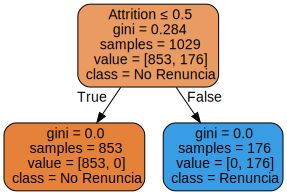

In [68]:
from sklearn.tree import export_graphviz
import graphviz

best_tree = best_tree_model

dot_data = export_graphviz(best_tree, out_file=None, 
                           feature_names=X_train.columns,  
                           class_names=['No Renuncia', 'Renuncia'],
                           filled=True, rounded=True,  
                           special_characters=True)

graph = graphviz.Source(dot_data)

graph.render("arbol_decision") 
graph 


#### Verificamos "a mano" la probabilidad que una persona cualquiera va a renunciar.

In [69]:
empleado = X.sample()
empleado

Age  Attrition  DailyRate  DistanceFromHome  Education  \
219   54          0       1147                 3          3   

     EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
219                        4          52               3         2   

     JobSatisfaction  ...  JobRole_Manufacturing Director  \
219                1  ...                           False   

     JobRole_Research Director  JobRole_Research Scientist  \
219                      False                       False   

     JobRole_Sales Executive  JobRole_Sales Representative  \
219                     True                         False   

     MaritalStatus_Married  MaritalStatus_Single  OverTime_Yes  \
219                   True                 False         False   

     grupo_etario_joven  grupo_etario_senior  
219               False                 True  

[1 rows x 47 columns]

#### Realizamos lo mismo pero utilizando al modelo

In [70]:
random_search_tree.best_estimator_.predict_proba(empleado)

array([[1., 0.]])

#### Visualizamos todas las predicciones del modelo para el conjunto de datos de entrenamiento

In [71]:
y_pred = random_search_tree.best_estimator_.predict(X)
y_pred

array([1, 0, 1, ..., 0, 0, 0])

#### Comparamos las predicciones del modelo contra los valores reales del conjunto de entrenamiento

In [72]:
df_employees['pred'] = y_pred
df_employees.sample(10)[['Attrition','pred']]

Attrition  pred
378           1     1
843           0     0
1380          0     0
637           0     0
874           0     0
779           1     1
925           0     0
915           1     1
400           0     0
274           0     0

#### Vemos en cuántos casos coincide la predicción con el valor real

In [73]:
df_employees['Attrition'] == df_employees['pred']

0       True
1       True
2       True
3       True
4       True
        ... 
1465    True
1466    True
1467    True
1468    True
1469    True
Length: 1470, dtype: bool

In [74]:
(df_employees['Attrition'] == df_employees['pred']).sum()

1470

#### Entonces, ¿qué tan bueno es el modelo?

In [75]:
y_pred = random_search_tree.best_estimator_.predict(X)
df_employees['pred'] = y_pred

accuracy = (df_employees['Attrition'] == df_employees['pred']).mean()
print(f"Accuracy sobre todo el dataset: {accuracy:.2%}")

print("Score desde el modelo (accuracy):", random_search_tree.best_estimator_.score(X, y))


Accuracy sobre todo el dataset: 100.00%
Score desde el modelo (accuracy): 1.0


---

## **Parte 5: Ensamble Learning**


In [76]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, ExtraTreesRegressor
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

---

## **a) Random Forest // Bagging**

In [77]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [78]:
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=42)

In [79]:
y_pred = rfc.predict(X_test)

In [80]:
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy', metrix)

Accuracy 1.0


In [81]:
rf_classifier = RandomForestClassifier()
print("Best Parameters:")
print(rf_classifier.get_params())

Best Parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [82]:
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [83]:
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, cv=5, scoring='accuracy')
random_search.fit(X_train, y_train)
print("Randomized Search Completed.")
print("Mejores hiperparámetros:")
print(random_search.best_params_)

Randomized Search Completed.
Mejores hiperparámetros:
{'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy', 'bootstrap': True}


In [84]:
best_rf_model = random_search.best_estimator_

In [85]:
best_rf_model

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)

In [86]:
evaluate(best_rf_model, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[853   0]
 [  0 176]]
Accuracy: 1.0000
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0

=== TESTING RESULTS ===
Confusion Matrix:
[[380   0]
 [  0  61]]
Accuracy: 1.0000
Classification Report:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    380.0  61.0       1.0      441.0         441.0
AUC Score: 1.0000


---

## **b) XGBoost // Boosting**


##### 1. Entro un modelo base de XGBoost

In [87]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [88]:
y_pred = xgb.predict(X_test)

In [89]:
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)

Accuracy inicial: 1.0


##### 2. Ver los hiperparámetros por defecto

In [90]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
print("Parámetros por defecto:")
print(xgb_model.get_params())


Parámetros por defecto:
{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': 'logloss', 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None, 'use_label_encoder': False}


##### 3. Defino el espacio de búsqueda de hiperparámetros

In [91]:
param_dist_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [0.1, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}


##### 4. Hago RandomizedSearchCV con XGBoost

In [92]:
from sklearn.model_selection import RandomizedSearchCV

random_search_xgb = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist_xgb,
    n_iter=20,              # Ajustable
    scoring='accuracy',     # Podés usar 'roc_auc' también
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_xgb.fit(X_train, y_train)

print("✅ Randomized Search Completado - XGBoost")
print("Mejores hiperparámetros encontrados:")
print(random_search_xgb.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:18:57] WARNING: /Users/runner/work/

✅ Randomized Search Completado - XGBoost
Mejores hiperparámetros encontrados:
{'subsample': 0.8, 'reg_lambda': 10, 'reg_alpha': 0, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.1, 'gamma': 5, 'colsample_bytree': 0.8}


##### 5. Evaluo el mejor modelo encontrado

In [93]:
best_xgb_model = random_search_xgb.best_estimator_

print("Modelo final optimizado:")
print(best_xgb_model)

# Evaluar con tu función personalizada
evaluate(best_xgb_model, X_train, X_test, y_train, y_test)


Modelo final optimizado:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=5,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)
=== TRAINING RESULTS ===
Confusion Matrix:
[[853   0]
 [  0 176]]
Accuracy: 1.0000
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0      

---

## **c) LightBoost // Boosting**


##### 1. Entro un modelo base de XGBoost

In [94]:
from lightgbm import LGBMClassifier

# Modelo base
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predicción
y_pred = lgbm.predict(X_test)

# Evaluación inicial
from sklearn import metrics
metrix = metrics.accuracy_score(y_test, y_pred)
print('Accuracy inicial:', metrix)


[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

##### 2. Veo los hiperparámetros por defecto

In [95]:
lgbm_model = LGBMClassifier(random_state=42)
print("Parámetros por defecto:")
print(lgbm_model.get_params())


Parámetros por defecto:
{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': None, 'num_leaves': 31, 'objective': None, 'random_state': 42, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


##### 3. Defino el espacio de búsqueda de hiperparámetros

In [96]:
param_dist_lgbm = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15, -1],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'num_leaves': [15, 31, 50, 100],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_lambda': [0, 1, 10],
    'reg_alpha': [0, 0.1, 1]
}


##### 4. Hacer RandomizedSearchCV con LightGBM

In [97]:
from sklearn.model_selection import RandomizedSearchCV

random_search_lgbm = RandomizedSearchCV(
    estimator=lgbm_model,
    param_distributions=param_dist_lgbm,
    n_iter=20,               # Ajustable según recursos
    scoring='accuracy',      # o 'roc_auc'
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

random_search_lgbm.fit(X_train, y_train)

print("✅ Randomized Search Completado - LightGBM")
print("Mejores hiperparámetros encontrados:")
print(random_search_lgbm.best_params_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020337 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1179
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=

##### 5. Evaluar el mejor modelo encontrado

In [98]:
best_lgbm_model = random_search_lgbm.best_estimator_

print("Modelo final optimizado:")
print(best_lgbm_model)

# Evaluación
evaluate(best_lgbm_model, X_train, X_test, y_train, y_test)

Modelo final optimizado:
LGBMClassifier(colsample_bytree=0.8, learning_rate=0.05, max_depth=15,
               n_estimators=200, random_state=42, reg_alpha=0, reg_lambda=10,
               subsample=0.8)
=== TRAINING RESULTS ===
Confusion Matrix:
[[853   0]
 [  0 176]]
Accuracy: 1.0000
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0

=== TESTING RESULTS ===
Confusion Matrix:
[[380   0]
 [  0  61]]
Accuracy: 1.0000
Classification Report:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    380.0  61.0       1.0      441.0         441.0

---

## **d) Voting // Boosting**

#####  1. Creo el VotingClassifier con los mejores modelos

In [99]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[
        ('rf', best_rf_model),
        ('xgb', best_xgb_model),
        ('lgbm', best_lgbm_model)
        # ('tree', best_tree_model)  # opcional si usaste uno
    ],
    voting='soft'  # usar probabilidades, más preciso que 'hard'
)


##### 2. Entrenar el modelo Voting

In [100]:
voting_clf.fit(X_train, y_train)

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/xgboost/training.py:183: UserWarning: [15:19:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 176, number of negative: 853
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001538 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1188
[LightGBM] [Info] Number of data points in the train set: 1029, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171040 -> initscore=-1.578276
[LightGBM] [Info] Start training from score -1.578276
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=150)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feat...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.8,
                                             learning_rate=0.05, max_depth=15,
                                             n_estimators=200, random_state=42,
                                             reg_alpha=0, reg_lambda=10,
                                             subsample=0.8))],
                 voting='soft')

##### 3. Evaluo el modelo Voting final

In [101]:
evaluate(voting_clf, X_train, X_test, y_train, y_test)

=== TRAINING RESULTS ===
Confusion Matrix:
[[853   0]
 [  0 176]]
Accuracy: 1.0000
Classification Report:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    853.0  176.0       1.0     1029.0        1029.0

=== TESTING RESULTS ===
Confusion Matrix:
[[380   0]
 [  0  61]]
Accuracy: 1.0000
Classification Report:
               0     1  accuracy  macro avg  weighted avg
precision    1.0   1.0       1.0        1.0           1.0
recall       1.0   1.0       1.0        1.0           1.0
f1-score     1.0   1.0       1.0        1.0           1.0
support    380.0  61.0       1.0      441.0         441.0
AUC Score: 1.0000


In [102]:
y_pred_voting = voting_clf.predict(X_test)
y_proba_voting = voting_clf.predict_proba(X_test)[:, 1]

print("Accuracy:", metrics.accuracy_score(y_test, y_pred_voting))
print("AUC:", metrics.roc_auc_score(y_test, y_proba_voting))


Accuracy: 1.0
AUC: 1.0


---

## **Parte 8: Comparación de Modelos**


In [103]:
logisticRegr
best_tree_model
best_rf_model
best_xgb_model
best_lgbm_model
voting_clf


VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(criterion='entropy',
                                                     max_depth=10,
                                                     n_estimators=150)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.8, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None,
                                            feat...
                                            max_delta_step=None, max_depth=5,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=300, n_jobs=None,
                                            num_parallel_tree=None, ...)),
                             ('lgbm',
                              LGBMClassifier(colsample_bytree=0.8,
                                             learning_rate=0.05, max_depth=15,
                                             n_estimators=200, random_state=42,
                                             reg_alpha=0, reg_lambda=10,
                                             subsample=0.8))],
                 voting='soft')

In [104]:
scores = {
    'Logistic Regression': {'Train': logisticRegr.score(X_train, y_train), 'Test': logisticRegr.score(X_test, y_test)},
    'Decision Tree': {'Train': best_tree_model.score(X_train, y_train), 'Test': best_tree_model.score(X_test, y_test)},
    'Random Forest': {'Train': best_rf_model.score(X_train, y_train), 'Test': best_rf_model.score(X_test, y_test)},
    'XGBoost': {'Train': best_xgb_model.score(X_train, y_train), 'Test': best_xgb_model.score(X_test, y_test)},
    'LGBM': {'Train': best_lgbm_model.score(X_train, y_train), 'Test': best_lgbm_model.score(X_test, y_test)},
    'Voting': {'Train': voting_clf.score(X_train, y_train), 'Test': voting_clf.score(X_test, y_test)},
}

/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/Users/lolonastri/opt/anaconda3/envs/POO-env/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

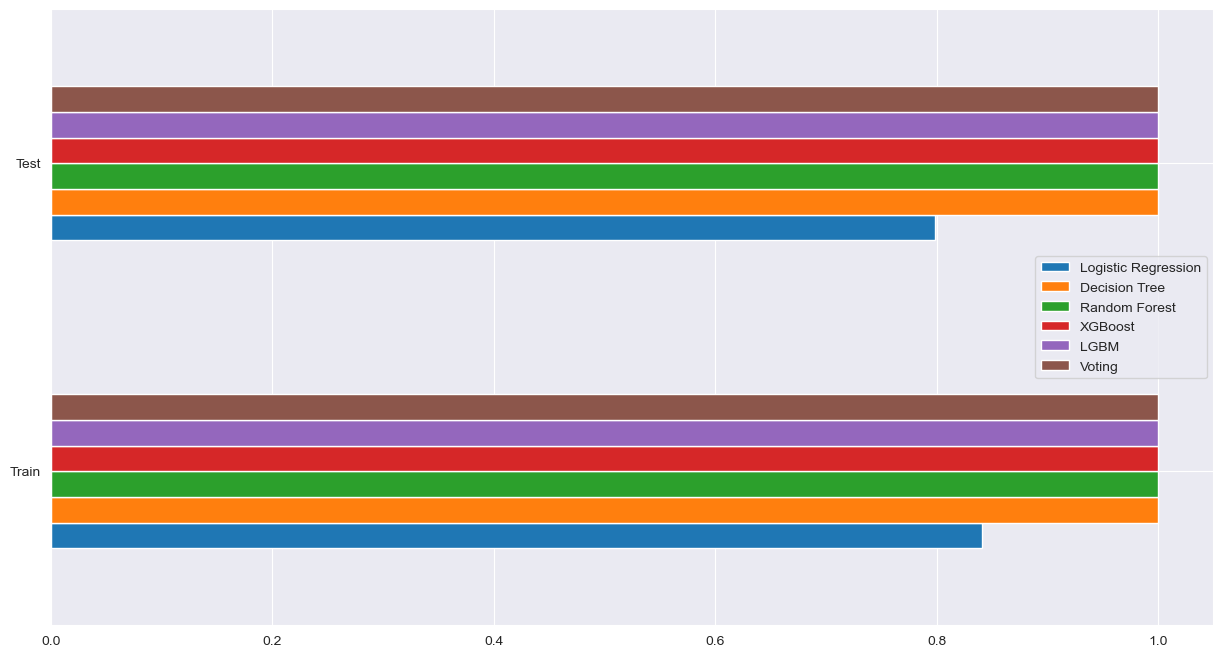

In [105]:
scores_df = pd.DataFrame(scores)
scores_df.plot(kind='barh', figsize=(15, 8))